In [8]:
from qmpy import *
from django.db.models import Count
import seaborn as sns
import freud
import ase
from ase import io
import numpy as np
import sklearn
from sklearn import decomposition
from chemiscope import write_input
import random

from datetime import datetime
import time
import os

from django.db import models
from django.db import transaction
import networkx as nx

from qmpy.db.custom import *
from qmpy.materials.composition import *
from qmpy.materials.element import Element, Species
from qmpy.materials.structure import Structure, StructureError
from qmpy.utils import *
from qmpy.computing.resources import Project
from qmpy.data.meta_data import *
import qmpy.io.poscar as poscar
import qmpy.io.cif as cif
from qmpy.io import ase_mapper
import qmpy.computing.scripts as scripts
import qmpy.analysis.vasp as vasp

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn import linear_model
# from sklearn import grid_search


In [13]:
c=Structure.objects.all()
c.Structure()
# c = Composition.get('Fe')
# entries=c.entries
# structure=structure()
# # (returns a list of non-duplicate entries.)
# all_entries=c.entry_set.all()
# (returns a list of all entries associated with the composition object.)

AttributeError: 'QuerySet' object has no attribute 'Structure'

In [17]:
import qmpy.io as io

structure=Entry.objects.values('structure')
(structure[0])
# atoms = io.ase_mapper.structure_to_atoms(structure)
# ase=[]
# for structure in struc:
#     print(structure)
#     ase1=structure.ase_mapper
#     print(type(ase1), ase1)
#     ase.append(ase1)
# struc.count()

{'structure': 411779}

In [112]:
select=100
# al=random.sample(Entry.objects.all(), select)
al=Entry.objects.all()
f=Entry.objects.values()
# a=random.sample(Entry.objects.values(), select)
print(type(f))
f.count()
a=Atom.get()
stable = Entry.objects.filter(formationenergy__stability__lt=0)
stable.count()
# frames_ase=[]
# for [structure_data] in al:
#     frame=structure_data.get_ase()
#     frame.wrap()
#     frames_ase.append(frame)


<class 'django.db.models.query.QuerySet'>


AttributeError: type object 'Atom' has no attribute 'get'

In [32]:
models = Calculation.objects.values()
structure=Structure.objects.values()
(structure[27598])
# from ase import Atoms
# ase_frame = Atoms('Au',positions=[[0, L / 2, L / 2]],pbc=True)
# models = models.filter(converged=True, label__in=['static', 'standard'])
# models = models.exclude(composition__element_set=out_elts)
# data = models.values_list('composition_id', 'positions','formationenergy', 'natoms')
# print(data[3])

{'id': 71676,
 'entry_id': 3915,
 'reference_id': None,
 'label': 'standard',
 'prototype_id': None,
 'measured': False,
 'composition_id': 'B1 H7 N2',
 'natoms': 80,
 'nsites': 80,
 'ntypes': 3,
 'x1': 9.030321,
 'x2': 0.0,
 'x3': 0.0,
 'y1': 0.0,
 'y2': 4.763113,
 'y3': 0.0,
 'z1': 0.0,
 'z2': 0.0,
 'z3': 12.021911,
 'volume': 517.092,
 'volume_pa': 6.46365,
 'sxx': 14.09933,
 'syy': 11.93352,
 'szz': 12.95859,
 'sxy': 0.0,
 'syz': 0.0,
 'szx': 0.0,
 'spacegroup_id': 60,
 'energy': None,
 'energy_pa': None,
 'magmom': None,
 'magmom_pa': None,
 'delta_e': None,
 'meta_stability': None}

In [27]:

formE = list(Entry.objects.values('formationenergy'))

natoms=[]
natoms_dict = list(Entry.objects.values('natoms'))

# type(natoms_dict[0]['natoms'])
# for i in range(len(natoms_dict)):
    
#     natoms.append(natoms_dict[i]['natoms'])
#     print(natoms)
# print(natoms)
print(len(natoms_dict), len(formE))


{'natoms': 24}
814375 1666988


In [52]:
natoms_dict = list(Entry.objects.values('natoms'))[::10]
formE = list(Entry.objects.values('formationenergy'))[::10]
natoms=[i['natoms'] for i in natoms_dict]
print(sum(float(i) for i in natoms), len(formE))


502610.0 166699


In [21]:
frames = ase.io.read('trajectory.xyz', ':')


properties = {
    "PCA": {
        "target": "atom",
        "values": formE,
    },
    "energies": {
        "target": "structure",
        "values": natoms_dict,
        
    },
}

write_input("chemiscope_OQMD.json.gz", frames=frames, properties=properties)

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

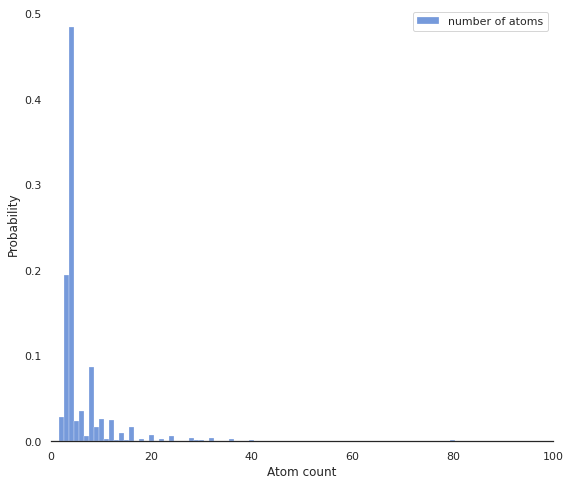

In [ ]:
natoms=[]
red_db = list(Entry.objects.values('natoms'))
for i in range(len(red_db)):
    natoms.append(red_db[i]['natoms'])
    
E=[]
formE = list(Entry.objects.values('formationenergy'))[::10000]
for i in range(len(formE)):
    E.append(formE[i]['formationenergy'])

    

sns.set(style="white", palette="muted", color_codes=True)
f, ax = plt.subplots(figsize=(9, 8))
sns.despine(left=True)
sns.histplot(data=natoms, stat="probability", color='b', discrete=True, label='number of atoms')
ax.set_xlabel('Atom count')
plt.legend()
plt.xlim(0,100)
# plt.savefig('oqmd_natom_occ.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


sns.set(style="white", palette="muted", color_codes=True)
f, ax = plt.subplots(figsize=(9, 8))
sns.despine(left=True)
sns.histplot(data=E, stat="probability", color='r', discrete=True, label='number of atoms')
ax.set_xlabel('Atom count')
plt.legend()
plt.xlim(0,100)
# plt.savefig('oqmd_natom_occ.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

# stat{“count”, “frequency”, “density”, “probability”}

In [6]:
print(list(Entry.objects.values))

FE = list(Entry.objects.values('formationenergy'))[::10]
FE1 = list(Entry.objects.annotate(n_structures=Count('formationenergy')))[::10]
print(type(FE), len(FE), FE[0])
print(type(FE1), len(FE1), FE1[0])

n_atoms = list(Entry.objects.values('natoms'))[::10]
n_atoms1 = list(Entry.objects.annotate(n_structures=Count('natoms')))[::10]
print(type(n_atoms), len(n_atoms), n_atoms[0])
print(type(n_atoms1), len(n_atoms1), n_atoms1[0])



<bound method BaseManager._get_queryset_methods.<locals>.create_method.<locals>.manager_method of <django.db.models.manager.Manager object at 0x7f68813937b8>>
<class 'list'> 166699 {'formationenergy': 4830529}
<class 'list'> 81438 1603 - LaF3
<class 'list'> 81438 {'natoms': 24}
<class 'list'> 81438 1603 - LaF3


In [ ]:
FE = list(Entry.objects.values('formationenergy'))[::1000]
# FE1 = list(Entry.objects.annotate(n_structures=Count('formationenergy')))[::1000]

formE=[]
formE1=[]
for i in range(len(FE)):
    formE.append(FE[i]['formationenergy'])
    
# for i in range(len(FE1)):
#     formE1.append(FE1[i])

sns.set(style="white", palette="muted", color_codes=True)
# f, ax = plt.subplots(figsize=(9, 8))
# sns.despine(left=True)

# sns.histplot(data=formE1, stat="probability", color='orange', discrete=True, label='Formation Energy (eV)')


# ax.set_xlabel('Formation Energy (eV)')
# plt.legend()
# plt.xlim(0,100)
# plt.savefig('oqmd_formE_occ.png', bbox_inches='tight', dpi=400)
# plt.show()
# plt.close()

f, ax = plt.subplots(figsize=(9, 8))
sns.despine(left=True)

sns.histplot(data=formE, stat="probability", color='r', discrete=True, label='Formation Energy (eV)')

ax.set_xlabel('Formation Energy (eV)')
plt.legend()
plt.xlim(0,100)
plt.savefig('oqmd_formE_occ.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [89]:
elts = Element.objects.filter(symbol__in=element_groups['simple-metals']).first()
out_elts = Element.objects.exclude(symbol__in=element_groups['simple-metals'])
models = Calculation.objects.filter(path__contains='icsd')
models = models.filter(converged=True, label__in=['static', 'standard']).first()
models = models.exclude(composition__element_set=out_elts)
data = models.values_list('composition_id', 'output__volume_pa')

AttributeError: 'Calculation' object has no attribute 'exclude'

In [90]:
y = []
X = []
for c, v in data:
    y.append(v)
    X.append(get_basic_composition_descriptors(c).values())
X = np.array(X)
y = np.array(y)
print(X)
# x1, x2, y1, y2 = cross_validation.train_test_split(X, y, train_size=0.5)

ValueError: The QuerySet value for an exact lookup must be limited to one result using slicing.